# The Project #

This project was done as a part of the final course assignment in the "Python 3 Programming Specialization" by University of Michigan on Coursera ([Link](https://www.coursera.org/specializations/python-3-programming?))

We use the following libraries in python for this project - pillow, opencv & tesseract

The aim of the project was as follows - 

1. Input data is a collection of newspaper pages as images. These are saved in a zip file.
2. We need to create a function which asks user for a name and then returns a contact sheet of faces from each image where this name appears.
3. We will have to detect the text appearing in the images, as well as detect faces and show the faces if the name appears in the text. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza".

In [1]:
#################################################################
# import key libraries
#################################################################

import zipfile

from zipfile import ZipFile
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import os

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('data/haarcascade_frontalface_default.xml')

In [2]:
#################################################################
# read the SMALL image zip file and store all the files in the folder
#################################################################

zip_file = 'data/small_img.zip'
small_image_files = []

with ZipFile(zip_file, 'r') as z:
    # extract all the files in the readonly directory
    z.extractall('data/small_files')
    
    # for each file get the file name and read those files using PIL image store the names in array
    for info in z.infolist():
        small_image_files.append(info.filename)
print(small_image_files)

['a-0.png', 'a-1.png', 'a-2.png', 'a-3.png']


In [3]:
#################################################################
# read the LARGE image zip file and store all the files in the folder
#################################################################

zip_file = 'data/images.zip'
large_image_files = []

with ZipFile(zip_file, 'r') as z:
    # extract all the files in the readonly directory
    z.extractall('data/all_images')
    
    # for each file get the file name and read those files using PIL image store the names in array
    for info in z.infolist():
        large_image_files.append(info.filename)
print(large_image_files)

['a-0.png', 'a-1.png', 'a-10.png', 'a-11.png', 'a-12.png', 'a-13.png', 'a-2.png', 'a-3.png', 'a-4.png', 'a-5.png', 'a-6.png', 'a-7.png', 'a-8.png', 'a-9.png']


In [4]:
#################################################################
# function to create a dictionary of text + contact sheet of faces found in the images
# this stored dictionary will help us make the search easy
#################################################################

def get_text_faces_cs(path, image_files):
    # search dictionary which will store the text and the contact sheet of faces
    search_arr = {}
    
    img_cnt = 1
    
    for img_name in image_files:
        pil_img = Image.open(str(path)+str(img_name))
        print("Working with the image "+str(img_cnt)+" : "+str(img_name))

        # get the text from the image
        text = pytesseract.image_to_string(pil_img)

        # convert image to grayscale for detecting faces
        open_cv_version = pil_img.convert("L")
        open_cv_version.save(str(path) + 'test_gray.png')
        cv_img=cv.imread(str(path) + 'test_gray.png')

        # detect faces in that image
        faces = face_cascade.detectMultiScale(cv_img, 1.3)

        if len(faces) > 0:
            # cut out the faces from the main image as individual images
            images = []
            for x,y,w,h in faces:
                bounding_box=(x, y, x+w, y+h)
                title_image=pil_img.crop(bounding_box)
                title_image = title_image.resize((100,100))
                images.append(title_image)
                
            # create a contact sheet of the faces
            first_image=images[0]
            contact_sheet=Image.new(first_image.mode, (500, 100*int(np.ceil(len(faces)/5))))
            x=0
            y=0
            for i in range(len(images)):
                contact_sheet.paste(images[i], (x, y))
                if x+first_image.width == contact_sheet.width:
                    x=0
                    y=y+int(first_image.height)
                else:
                    x=x+first_image.width
            
            # append the text and the contact sheet in the array
            temp = [len(faces), text, contact_sheet]
            search_arr[img_name] = temp
            del temp
            
        else:
            temp = [len(faces), text, None]
            search_arr[img_name] = temp
            del temp
        
        img_cnt = img_cnt + 1
    
    # return the final dictionary    
    return search_arr

print("Creating search array for SMALL image file - ")
small_search_arr = get_text_faces_cs('data/small_files/', small_image_files)
print("Creating search array for LARGE image file - ")
large_search_arr = get_text_faces_cs('data/all_images/', large_image_files)

Creating search array for SMALL image file - 
Working with the image 1 : a-0.png
Working with the image 2 : a-1.png
Working with the image 3 : a-2.png
Working with the image 4 : a-3.png
Creating search array for LARGE image file - 
Working with the image 1 : a-0.png
Working with the image 2 : a-1.png
Working with the image 3 : a-10.png
Working with the image 4 : a-11.png
Working with the image 5 : a-12.png
Working with the image 6 : a-13.png
Working with the image 7 : a-2.png
Working with the image 8 : a-3.png
Working with the image 9 : a-4.png
Working with the image 10 : a-5.png
Working with the image 11 : a-6.png
Working with the image 12 : a-7.png
Working with the image 13 : a-8.png
Working with the image 14 : a-9.png


In [5]:
# show the example entry of the search dictionary - LARGE image file
print("Entry for the image a-0.png")
large_search_arr['a-0.png']

Entry for the image a-0.png


[8,
 "Che Michigan Daily\n\nAnn Arbor, Michigan\n\nWednesday, November 5, 2014\n\nmichigandaily.com\n\nBIG DAY FOR REPUBLICANS\n\nSNYDER EARNS SECOND TERM; G.O.P. TAKES CONTROL OF U.S. SENATE\n\nSTATE\n\nEXECUTIVE\nGOVERNOR\nRick Snyder (R)\n\nLIEUTENANT\nGOVERNOR\nBrian Calley (R)\n\nSECRETARY OF\nSTATE\nRuth Johnson CR)\n\nSTATE\nJUDICIAL\n\nATTORNEY GENERAL\nBill Schuette CR)\n\nMICHIGAN\nLEGISLATIVE\n\nMICHIGAN STATE\nSENATE\nRebekah Warren (D)\n\nMICHIGAN HOUSE\nOF REPRESENTATIVES\nJeff Irwin CD)\n\nU.S.\nLEGISLATIVE\n\nU.S. SENATE\nGary Peters (D)\n\nU.S. HOUSE OF\nREPRESENTATIVES\nDebbie Dingell (D)\n\nWASHTENAW\nCOUNTY\n\nPROBATE COURT\nJulia Owdziej (D)\n\nCIRCUIT COURT\nPatrick Conlin (D)\n\nANN ARBOR\nMAYOR\nChristopher Taylor (D)\n\nCITY COUNCIL\n\nSumi Kailasapathy (D)\nChuck Warpehoski (D)\nJulie Grand (D)\nGraydon Kraphol (D)\nKirk Westphal (D)\n\nREGENTS\n\nToo close to call\n\nHI: 51\nLO: 30\n\nWEATHER\nTOMORROW\n\n \n\n \n\n‘alll ai\n\nTOP: Republican Gov. Rick Snyder

In [6]:
#################################################################
# function to ask user a search string and then iterates over the 
# mentioned search dictionary (small or large) to print results
#################################################################

def search_str(s, search_arr):
    s_found = 0
    for img_name, val in search_arr.items():
        if s in val[1]:
            s_found = s_found + 1
            print("Results found in the file "+str(img_name))
            if val[0] > 0:
                display(val[2])
            else:
                print("But there were no faces in that file!")
    # print error message in case the word was not found in any file
    if s_found == 0:
        print("Sorry, the search word was not found in any file!")

Results found in the file a-0.png


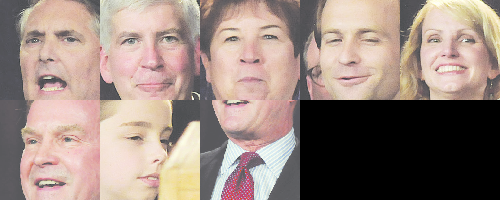

Results found in the file a-3.png


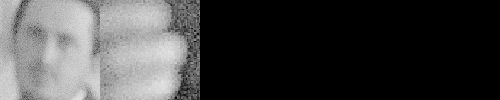

In [7]:
# check 1st example search word - Christopher in small img file
search_str("Christopher", small_search_arr)

Results found in the file a-0.png


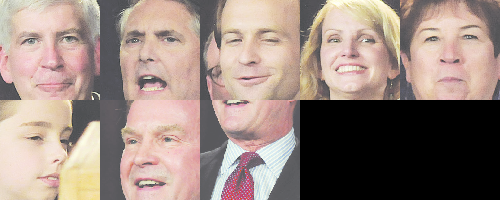

Results found in the file a-1.png


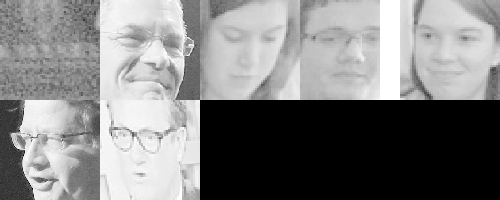

Results found in the file a-10.png
But there were no faces in that file!
Results found in the file a-13.png


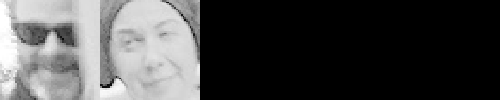

Results found in the file a-2.png


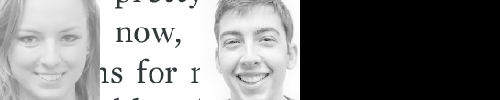

Results found in the file a-3.png


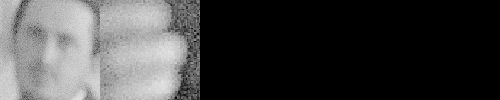

Results found in the file a-8.png
But there were no faces in that file!


In [8]:
# check 2nd example search word - Mark in LARGE img file
search_str("Mark", large_search_arr)

In [9]:
# Check random search word - Coursera in LARGE img file
search_str("Coursera", large_search_arr)

Sorry, the search word was not found in any file!
